In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image, ImageOps

mnist = tf.keras.datasets.mnist # Taking a dataset that is already preinstalled

# x_train holds all the data, y_train holds all teh labels of the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train, x_test = x_train / 255.0, x_test / 255.0 # Scaling the data, so it improves the accuracy of the machine learning model
# Talk about the test data set
print(y_train)

2022-11-08 13:06:41.586501: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-08 13:06:42.744747: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-08 13:06:42.744776: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-08 13:06:43.048590: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-08 13:06:45.766166: W tensorflow/stream_executor/platform/de

[5 0 4 ... 5 6 8]


In [4]:
os.chdir(r"C:\Users\Kevin Tang\Documents\TensorFlow")
!python -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
x_train.shape
x_test.shape

(10000, 28, 28)

In [3]:
y_train.shape
y_test.shape

(10000,)

In [4]:
y_test
y_test.shape


(10000,)

In [71]:
first_pic = x_train[0]
print(first_pic)
first_pic.shape

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

(28, 28)

In [6]:
first_pic.max()

1.0

In [5]:
a = np.array([[[1,2,3,4], [5,6,7,8]]])
print(a)
# Checking number of elements in each dimensions
a.shape

[[[1 2 3 4]
  [5 6 7 8]]]


(1, 2, 4)

In [12]:
# Checks dimensions
a.ndim

2

In [6]:
a1 = np.array([1, 2, 3])
a2 = np.array([4, 5, 6])

In [8]:
# Matrix Multiplication
a1 * a2
# Another Example
list = []
for i, j in zip(a1, a2):
  list.append(i * j)
print(list)

[x[0]*x[1] for x in zip(a1,a2)]
[a*b for a,b in zip(a1,a2)]

array([ 4, 10, 18])

The image at the 0th index is: 


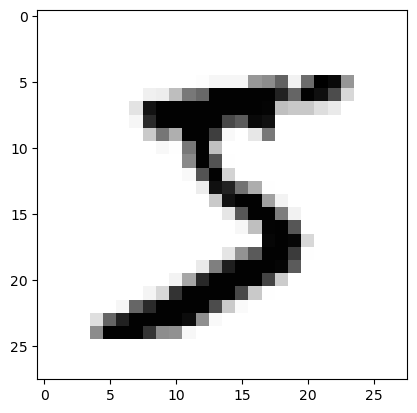

In [12]:
image_num = 0

print(f"The image at the {image_num}th index is: ")
plt.imshow(x_train[image_num], cmap="Greys")

In [21]:
y_train[0]
np.unique(y_train) # Can see that all numbers from 0 to 9 is included
plt.imshow(y_train[0], cmap="Greys")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
one = 0
two = 0
three = 0
four = 0
five = 0
six = 0
seven = 0
eight = 0
nine = 0

for i in y_train:
  if i == 1:
    one += 1
  if i == 2:
    two += 1
  if i == 3:
    three += 1
  if i == 4:
    four += 1
  if i == 5:
    five += 1
  if i == 6:
    six += 1
  if i == 7:
    seven += 1
  if i == 8:
    eight += 1
  if i == 9:
    nine += 1

print(one, two, three, four, five, six, seven, eight, nine)

from collections import Counter
Counter(y_train)

In [ ]:
import random
a_list = []
for i in range(0, 784):
  n  = random.randint(0, 1)
  a_list.append(n)
a_list

In [72]:
random_list = [random.uniform(0,1) for i in range(784)]
random_array = np.array(random_list)
random_array, random_array.shape

NameError: name 'random' is not defined

In [25]:
random_array = random_array.reshape((28,28))
random_array.shape

(28, 28)

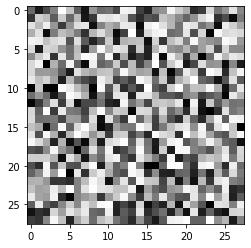

In [26]:
plt.imshow(random_array, cmap='Greys')

# Building Model

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


# Here is the model
model = Sequential([
                    Flatten(input_shape=(28, 28)), # fully conv if not flatten, not using cnn, so no way to put all data into dense layer
                    Dense(units = 16, activation="relu"),
                    Dense(units = 16, activation="relu"),
                    Dense(10, activation = "softmax")
]) # talk about the model.summary details

# More complicated one with more neurons and an extra layer
# model = Sequential([
#                     Flatten(input_shape=(28, 28)), # fully conv if not flatten, not using cnn, so no way to put all data into dense layer
#                     Dense(units = 128, activation="relu"),
#                     Dense(units = 128, activation="relu"),
#                     Dense(units = 128, activation="relu"),
#                     Dense(20, activation = "softmax")
# ])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         


2022-11-08 13:07:05.305341: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-08 13:07:05.305410: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-08 13:07:05.305444: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (overdose): /proc/driver/nvidia/version does not exist
2022-11-08 13:07:05.305855: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer='adam', # Used for the gradients
              loss='sparse_categorical_crossentropy', # Our loss function, which we are using cross-entropy
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/30
118/118 [==============================] - 2s 5ms/step - loss: 0.6234 - accuracy: 0.8299 - val_loss: 0.2273 - val_accuracy: 0.9345
Epoch 2/30
118/118 [==============================] - 0s 3ms/step - loss: 0.1884 - accuracy: 0.9451 - val_loss: 0.1597 - val_accuracy: 0.9496
Epoch 3/30
118/118 [==============================] - 0s 3ms/step - loss: 0.1314 - accuracy: 0.9602 - val_loss: 0.1201 - val_accuracy: 0.9613
Epoch 4/30
118/118 [==============================] - 0s 3ms/step - loss: 0.1013 - accuracy: 0.9692 - val_loss: 0.1069 - val_accuracy: 0.9673
Epoch 5/30
118/118 [==============================] - 0s 3ms/step - loss: 0.0797 - accuracy: 0.9759 - val_loss: 0.0923 - val_accuracy: 0.9697
Epoch 6/30
118/118 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.9801 - val_loss: 0.0870 - val_accuracy: 0.9728
Epoch 7/30
118/118 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9827 - val_loss: 0.0904 - val_accuracy: 0.9710
Epoch 

# Building Model V2

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scaling the data, so it improves the accuracy of the machine learning model
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

print(x_test[0].shape)
print(type(x_test[0]))

(28, 28)
<class 'numpy.ndarray'>


#Model Training

In [73]:
a = np.array([1,2])
a.shape
b = np.expand_dims(a, 1)
print(b)
b.shape

[[1]
 [2]]


(2, 1)

In [32]:
x_train.shape

(60000, 28, 28)

In [79]:
np.expand_dims(x_train, 3).shape
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
# Skip this part
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout

# model = keras.Sequential([
#     keras.layers.Dense(784, input_shape=(784,), activation='relu'),
#     keras.layers.Dense(400, activation='relu'),
#     keras.layers.Dense(10, activation='sigmoid')
# ])

model = keras.Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu', input_shape = (28, 28, 1)),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation='relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation='relu'),
    Flatten(),
    Dropout(0.2), # Talk about dropout
    Dense(784, activation='relu'),
    Dense(400, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 6272)              0

In [ ]:
# Defining it to a var so we can get the data later on
history = model.fit(np.expand_dims(x_train, 3), y_train, epochs=30, batch_size=512, validation_data=(np.expand_dims(x_test, 3), y_test))
# history = model.fit(x_train_flattened, y_train, epochs=30, validation_data=(x_test_flattened, y_test))


#Save/Load

In [15]:
model.save("MNIST.h5")

In [5]:
model = tf.keras.models.load_model('MNIST.h5')

#Prediction

In [ ]:
# !git clone https://gist.github.com/8409b3feec20f159d8a50b0a811d3bca.git colab_draw
%run collab_draw/draw.py

draw(filename = "number.png", w=400, h=400, line_width=15)

313/313 [==============================] - 0s 1ms/step
[2.7536231e-04 2.7567044e-02 2.4414978e-03 2.1988373e-01 9.0106869e-01
 1.2542910e-03 1.3755032e-04 1.0000000e+00 2.0760356e-02 9.6610838e-01]
0.00028 0.02757 0.00244 0.21988 0.90107 0.00125 0.00014 1.0 0.02076 0.96611  -------------------------------------------------------- 
The model predicts 7, with a 100.0% certainty.


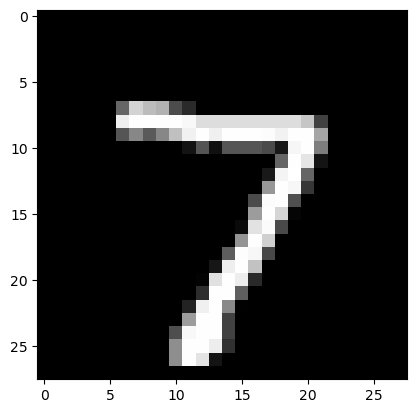

In [14]:
# Evaluating the accuracy on the "test" dataset
model.evaluate(np.expand_dims(x_test, 3), y_test)

# shows you an array of how likely of what number the number is
y_predicted = model.predict(np.expand_dims(x_test, 3))

print(y_predicted[0])
for i in y_predicted[0]:
    print(round(i, 5), end=" ")

print(" -------------------------------------------------------- ")

print(f"The model predicts {np.argmax(y_predicted[0])}, with a {y_predicted[0].max() * 100}% certainty.")

# Shows the actual number
# plt.matshow(x_test[0])
plt.imshow(x_test[0], cmap="Greys_r")

In [11]:
from PIL import Image, ImageOps

def resize(img):
    resized_img = img.resize((28, 28), Image.ANTIALIAS)
    resized_img.save("number.png")

    # img = cv.imread('number.png')
    # img = np.float32(img) # Converting in to numpy array
    # img.flatten()
    return img

OSError: not supported for this image mode

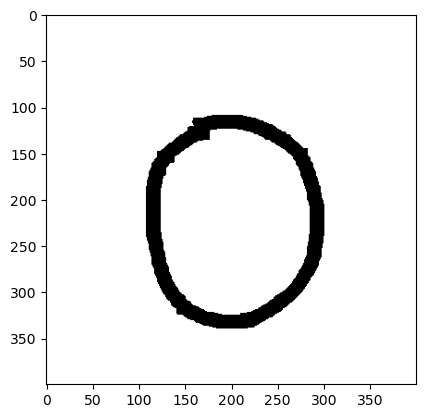

In [16]:
img = Image.open("number.png")

# Removes the alpha channel, because it wouldn't work
def remove_transparency(img, bg_colour=(255, 255, 255)):
    if img.mode in ('RGBA', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
        alpha = img.convert('RGBA').split()[-1]
        bg = Image.new("RGBA", img.size, bg_colour + (255,))
        bg.paste(img, mask=alpha)
        return bg
    else:
        return img

def predict(img):
    img = ImageOps.invert(img) # invert image from white to black to black to white
    img = img.resize((28,28))
    img_array = np.array(img) / 255 # Recall, we need to normalize to get best results
    img_array = np.expand_dims(img_array, axis=0)
    img_array = np.expand_dims(img_array, axis=3)
    print(img_array.shape) # (1, 28, 28, 1) (batch, width, height, rgb)
    y_pred = model.predict(img_array)
    return y_pred

remove_transparency(img=Image.open("number.png")).save("number.png")
img = Image.open("number.png")
img = img.convert("L") # Makes the image black and white

image = plt.imread("number.png")
plt.imshow(image)
y_pred = predict(img)

print(*y_pred)
print(f"The model predicts {np.argmax(y_pred)}, with a {y_pred.max() * 100}% certaintly rate")

plt.imshow(img, cmap="Greys_r")
plt.imshow(img.resize((28, 28)), cmap="Greys")

# y_predicted = model.predict(np.expand_dims(img, 3))
# print(y_predicted[0])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
import os

os.chdir(r"C:\Users\Kevin Tang\Documents\TensorFlow")